## Banking Case Study : Loan Status Prediction

**Problem Statement** - Given various features about a customer like Age, Income,
Loan Amount, Loan Intent, Home Ownership etc.. , predict if in case the loan is
given, will the customer *default or not* on the Loan payments.

In [1]:
!pip install -U scikit-learn

### Import the required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics

### Load the Data

In [3]:
df=pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [5]:
df = df[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate','loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length','loan_status']]

df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_percent_income         32581 non-null  float64
 9   cb_person_default_on_file   32581 non-null  object 
 10  cb_person_cred_hist_length  32581 non-null  int64  
 11  loan_status                 32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [7]:
df.shape

(32581, 12)

### Remove unwanted column

In [8]:
del df['loan_percent_income']

In [9]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,Y,3,1
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,N,2,0
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,N,3,1
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,N,2,1
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,Y,4,1


In [10]:
df.shape

(32581, 11)

### Treating Null values

In [11]:
df.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
cb_person_default_on_file        0
cb_person_cred_hist_length       0
loan_status                      0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
loan_status                   0
dtype: int64

In [14]:
df.shape

(28638, 11)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,28638.0,27.727216,6.310441,20.00,23.0,26.00,30.00,144.00
person_income,28638.0,66649.371884,62356.447405,4000.00,39480.0,55956.00,80000.00,6000000.00
person_emp_length,28638.0,4.788672,4.154627,0.00,2.0,4.00,7.00,123.00
loan_amnt,28638.0,9656.493121,6329.683361,500.00,5000.0,8000.00,12500.00,35000.00
loan_int_rate,28638.0,11.039867,3.229372,5.42,7.9,10.99,13.48,23.22
cb_person_cred_hist_length,28638.0,5.793736,4.038483,2.00,3.0,4.00,8.00,30.00
loan_status,28638.0,0.216600,0.411935,0.00,0.0,0.00,0.00,1.00


### Identify the Target Variable

In [16]:
# Identifying the inputs (X) and output (y)

y = df['loan_status']  # Target Variable

X = df[['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate','cb_person_default_on_file', 'cb_person_cred_hist_length']]

### Model Selection

**Algorithm Type :** Supervised

**Task :** Classification (Since the target variable is discrete)

### Split into Train and Test Data

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

In [18]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
8898,23,60000,MORTGAGE,5.0,MEDICAL,C,22000,13.06,Y,3
26343,28,100000,OWN,5.0,VENTURE,C,11000,13.61,Y,8
23260,28,25000,RENT,1.0,EDUCATION,A,5000,7.51,N,7
253,24,180000,MORTGAGE,7.0,VENTURE,B,14000,11.99,N,2
781,26,73000,RENT,3.0,PERSONAL,B,20000,12.53,N,2


In [19]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(21478, 10) (21478,)
(7160, 10) (7160,)


### Data Pre-Processing on Train data

#### Separating Categorical and Numerical Columns

In [20]:
X_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
8898,23,60000,MORTGAGE,5.0,MEDICAL,C,22000,13.06,Y,3
26343,28,100000,OWN,5.0,VENTURE,C,11000,13.61,Y,8
23260,28,25000,RENT,1.0,EDUCATION,A,5000,7.51,N,7
253,24,180000,MORTGAGE,7.0,VENTURE,B,14000,11.99,N,2
781,26,73000,RENT,3.0,PERSONAL,B,20000,12.53,N,2


In [21]:
X_train.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [22]:
X_train_cat = X_train.select_dtypes(include=['object'])

X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
8898,MORTGAGE,MEDICAL,C,Y
26343,OWN,VENTURE,C,Y
23260,RENT,EDUCATION,A,N
253,MORTGAGE,VENTURE,B,N
781,RENT,PERSONAL,B,N


In [23]:
X_train_num = X_train.select_dtypes(include=['int64', 'float64'])

X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length
8898,23,60000,5.0,22000,13.06,3
26343,28,100000,5.0,11000,13.61,8
23260,28,25000,1.0,5000,7.51,7
253,24,180000,7.0,14000,11.99,2
781,26,73000,3.0,20000,12.53,2


#### Scaling the Numerical Features

In [24]:
X_train_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length
8898,23,60000,5.0,22000,13.06,3
26343,28,100000,5.0,11000,13.61,8
23260,28,25000,1.0,5000,7.51,7
253,24,180000,7.0,14000,11.99,2
781,26,73000,3.0,20000,12.53,2


In [25]:
# Using Standardization method

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length
8898,-0.760211,-0.128366,0.046498,1.942225,0.620400,-0.693111
26343,0.045918,0.664984,0.046498,0.209254,0.790190,0.547587
23260,0.045918,-0.822546,-0.923807,-0.736002,-1.092938,0.299447
253,-0.598985,2.251683,0.531651,0.681883,0.290081,-0.941250
781,-0.276534,0.129473,-0.438654,1.627139,0.456784,-0.941250


In [26]:
X_train_num.describe().T

,count,mean,std,min,25%,50%,75%,max
person_age,21478.0,27.715197,6.202632,20.00,23.0,26.00,30.00,123.00
person_income,21478.0,66472.087299,50420.320410,4000.00,39760.0,56000.00,80000.00,2039784.00
person_emp_length,21478.0,4.808315,4.122512,0.00,2.0,4.00,7.00,123.00
loan_amnt,21478.0,9671.760639,6347.631195,500.00,5000.0,8000.00,12500.00,35000.00
loan_int_rate,21478.0,11.050344,3.239368,5.42,7.9,10.99,13.48,23.22
cb_person_cred_hist_length,21478.0,5.793230,4.030086,2.00,3.0,4.00,8.00,30.00


In [27]:
print("Number of Numerical Features:", scaler.n_features_in_)
print()
print("Mean of each column:", scaler.mean_)
print()
print("Std of each column:", np.sqrt(scaler.var_))

Number of Numerical Features: 6

Mean of each column: [2.77151969e+01 6.64720873e+04 4.80831549e+00 9.67176064e+03
 1.10503441e+01 5.79323028e+00]

Std of each column: [6.20248719e+00 5.04191466e+04 4.12241581e+00 6.34748342e+03
 3.23929228e+00 4.02999241e+00]


#### Applying Label Encoding on Categorical Columns

In [28]:
X_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
8898,MORTGAGE,MEDICAL,C,Y
26343,OWN,VENTURE,C,Y
23260,RENT,EDUCATION,A,N
253,MORTGAGE,VENTURE,B,N
781,RENT,PERSONAL,B,N


In [29]:
X_train_cat_label = pd.DataFrame(index=X_train_cat.index)

X_train_cat_label.head()

""
8898
26343
23260
253
781


In [30]:
X_train_cat.person_home_ownership.unique()

array(['MORTGAGE', 'OWN', 'RENT', 'OTHER'], dtype=object)

In [31]:
person_home_ownership_encoder = {'MORTGAGE' : 1, 'OWN' : 2, 'RENT' : 3, 'OTHER' : 4}

X_train_cat_label['person_home_ownership'] = X_train_cat['person_home_ownership'].apply(lambda x : person_home_ownership_encoder[x])

X_train_cat_label.head()

,person_home_ownership
8898,1
26343,2
23260,3
253,1
781,3


In [32]:
X_train_cat.loan_intent.unique()

array(['MEDICAL', 'VENTURE', 'EDUCATION', 'PERSONAL', 'DEBTCONSOLIDATION',
       'HOMEIMPROVEMENT'], dtype=object)

In [33]:
loan_intent_encoder = {'MEDICAL':1, 'VENTURE':2, 'EDUCATION':3, 'PERSONAL':4, 'DEBTCONSOLIDATION':5,'HOMEIMPROVEMENT':6}

X_train_cat_label['loan_intent'] = X_train_cat['loan_intent'].apply(lambda x : loan_intent_encoder[x])

X_train_cat_label.head()

,person_home_ownership,loan_intent
8898,1,1
26343,2,2
23260,3,3
253,1,2
781,3,4


In [34]:
X_train_cat.loan_grade.unique()

array(['C', 'A', 'B', 'D', 'F', 'E', 'G'], dtype=object)

In [35]:
loan_grade_encoder = {'G':1, 'F':2, 'E':3, 'D':4, 'C':5,'B':6,'A':7}

X_train_cat_label['loan_grade'] = X_train_cat['loan_grade'].apply(lambda x : loan_grade_encoder[x])

X_train_cat_label.head()

,person_home_ownership,loan_intent,loan_grade
8898,1,1,5
26343,2,2,5
23260,3,3,7
253,1,2,6
781,3,4,6


In [36]:
X_train_cat.cb_person_default_on_file.unique()

array(['Y', 'N'], dtype=object)

In [37]:
cb_person_default_on_file_encoder = {'Y':1, 'N':2}

X_train_cat_label['cb_person_default_on_file'] = X_train_cat['cb_person_default_on_file'].apply(lambda x : cb_person_default_on_file_encoder[x])

X_train_cat_label.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
8898,1,1,5,1
26343,2,2,5,1
23260,3,3,7,2
253,1,2,6,2
781,3,4,6,2


#### Concatinating the Encoded Categorical Features and Rescaled Numerical Features

In [38]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_label], axis=1)

X_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
8898,-0.760211,-0.128366,0.046498,1.942225,0.620400,-0.693111,1,1,5,1
26343,0.045918,0.664984,0.046498,0.209254,0.790190,0.547587,2,2,5,1
23260,0.045918,-0.822546,-0.923807,-0.736002,-1.092938,0.299447,3,3,7,2
253,-0.598985,2.251683,0.531651,0.681883,0.290081,-0.941250,1,2,6,2
781,-0.276534,0.129473,-0.438654,1.627139,0.456784,-0.941250,3,4,6,2


### Data Pre-Processing on Test Data

In [39]:
X_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,cb_person_default_on_file,cb_person_cred_hist_length
17919,29,89000,RENT,1.0,EDUCATION,A,28800,7.49,N,6
8088,26,60000,RENT,0.0,VENTURE,B,7200,11.14,N,2
29464,45,74600,RENT,2.0,MEDICAL,C,1500,13.61,N,13
31640,37,39996,RENT,2.0,MEDICAL,A,1800,9.63,N,13
30838,39,66200,MORTGAGE,5.0,VENTURE,B,13750,9.88,N,16


In [40]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7160 entries, 17919 to 7970
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  7160 non-null   int64  
 1   person_income               7160 non-null   int64  
 2   person_home_ownership       7160 non-null   object 
 3   person_emp_length           7160 non-null   float64
 4   loan_intent                 7160 non-null   object 
 5   loan_grade                  7160 non-null   object 
 6   loan_amnt                   7160 non-null   int64  
 7   loan_int_rate               7160 non-null   float64
 8   cb_person_default_on_file   7160 non-null   object 
 9   cb_person_cred_hist_length  7160 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 615.3+ KB


In [41]:
X_test_cat = X_test.select_dtypes(include=['object'])

X_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
17919,RENT,EDUCATION,A,N
8088,RENT,VENTURE,B,N
29464,RENT,MEDICAL,C,N
31640,RENT,MEDICAL,A,N
30838,MORTGAGE,VENTURE,B,N


In [42]:
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

X_test_num.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length
17919,29,89000,1.0,28800,7.49,6
8088,26,60000,0.0,7200,11.14,2
29464,45,74600,2.0,1500,13.61,13
31640,37,39996,2.0,1800,9.63,13
30838,39,66200,5.0,13750,9.88,16


In [43]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length
17919,0.207143,0.446813,-0.923807,3.013515,-1.099112,0.051308
8088,-0.276534,-0.128366,-1.166383,-0.389408,0.027678,-0.941250
29464,2.786754,0.161207,-0.681231,-1.287402,0.790190,1.788284
31640,1.496948,-0.525120,-0.681231,-1.240139,-0.438474,1.788284
30838,1.819400,-0.005397,0.046498,0.642497,-0.361296,2.532702


In [44]:
X_test_cat_label = pd.DataFrame(index = X_test_cat.index)

X_test_cat_label.head()

""
17919
8088
29464
31640
30838


In [45]:
X_test_cat_label['person_home_ownership'] = X_test_cat['person_home_ownership'].apply(lambda x : person_home_ownership_encoder[x])

X_test_cat_label['loan_intent'] = X_test_cat['loan_intent'].apply(lambda x : loan_intent_encoder[x])

X_test_cat_label['loan_grade'] = X_test_cat['loan_grade'].apply(lambda x : loan_grade_encoder[x])

X_test_cat_label['cb_person_default_on_file'] = X_test_cat['cb_person_default_on_file'].apply(lambda x : cb_person_default_on_file_encoder[x])

X_test_cat_label.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
17919,3,3,7,2
8088,3,2,6,2
29464,3,1,5,2
31640,3,1,7,2
30838,1,2,6,2


In [46]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_label], axis=1)

X_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
17919,0.207143,0.446813,-0.923807,3.013515,-1.099112,0.051308,3,3,7,2
8088,-0.276534,-0.128366,-1.166383,-0.389408,0.027678,-0.941250,3,2,6,2
29464,2.786754,0.161207,-0.681231,-1.287402,0.790190,1.788284,3,1,5,2
31640,1.496948,-0.525120,-0.681231,-1.240139,-0.438474,1.788284,3,1,7,2
30838,1.819400,-0.005397,0.046498,0.642497,-0.361296,2.532702,1,2,6,2


## Model Building

### Logistic Regression

In [47]:
import time
st=time.time()

from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train_transformed, y_train)

et=time.time()
elapsed_time = et - st
print(elapsed_time,'s')

0.629065752029419 s


In [48]:
y_test_pred = regressor.predict(X_test_transformed)

In [49]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
17919,1,0
8088,0,0
29464,0,0
31640,0,0
30838,0,0


In [50]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.8416201117318436


### Support Vector Classifier

In [51]:
st=time.time()

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_transformed, y_train)

et=time.time()
elapsed_time = et - st
print(elapsed_time,'s')

18.307713270187378 s


In [52]:
y_test_pred = svc.predict(X_test_transformed)

In [53]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
17919,1,1
8088,0,0
29464,0,0
31640,0,0
30838,0,0


In [54]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.861731843575419


### K-Neighbors Classifier

In [55]:
st=time.time()

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_transformed, y_train)

et=time.time()
elapsed_time = et - st
print(elapsed_time,'s')

0.4907708168029785 s


In [56]:
y_test_pred = knn.predict(X_test_transformed)

In [57]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
17919,1,1
8088,0,0
29464,0,0
31640,0,0
30838,0,0


In [58]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.8671787709497206


### Decision Tree Classifier

In [59]:
st=time.time()

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_transformed, y_train)

et=time.time()
elapsed_time = et - st
print(elapsed_time,'s')

0.4926576614379883 s


In [60]:
y_test_pred = dt.predict(X_test_transformed)

In [61]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
17919,1,1
8088,0,0
29464,0,0
31640,0,0
30838,0,0


In [62]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.8860335195530726


### Random Forest Classifier

In [63]:
st=time.time()

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_transformed, y_train)

et=time.time()
elapsed_time = et - st
print(elapsed_time,'s')

4.0309669971466064 s


In [64]:
y_test_pred = rf.predict(X_test_transformed)

In [65]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
17919,1,0
8088,0,0
29464,0,0
31640,0,0
30838,0,0


In [66]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.9314245810055866


In [67]:
dict_={'Model Performed':
 ['Logistic Regression','Support Vector Classifier','K-Neighbors Classifier','Decision Tree Classifier','Random Forest Classifier'],
'Accuracy': [0.8416201117318436,0.861731843575419,0.8671787709497206,0.8839385474860335,0.9314245810055866],
'Time Taken': ['0.14860224723815918 s','17.33763551712036 s','0.1406240463256836 s','0.16456007957458496 s','3.835739850997925 s']}


dataframe=pd.DataFrame(dict_,index=[1,2,3,4,5])
dataframe

,Model Performed,Accuracy,Time Taken
1,Logistic Regression,0.841620,0.14860224723815918 s
2,Support Vector Classifier,0.861732,17.33763551712036 s
3,K-Neighbors Classifier,0.867179,0.1406240463256836 s
4,Decision Tree Classifier,0.883939,0.16456007957458496 s
5,Random Forest Classifier,0.931425,3.835739850997925 s


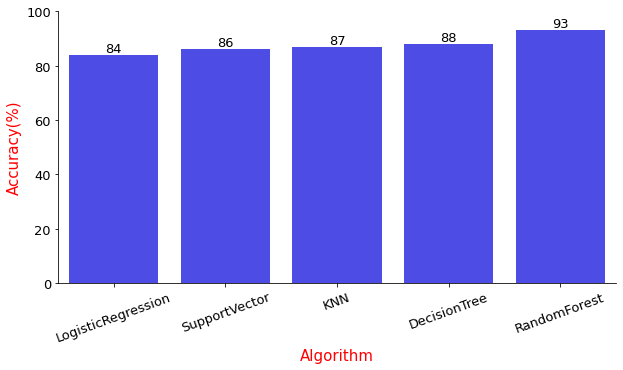

In [94]:
algo=['LogisticRegression','SupportVector','KNN','DecisionTree','RandomForest']
accur=[84,86,87,88,93]

plt.figure(figsize=(10, 5))

p=sns.barplot(y=accur,x=algo,color='b',alpha=0.8)
p.set_xlabel("Algorithm", fontsize = 15,color='r')
p.set_ylabel("Accuracy(%)", fontsize = 15,color='r')

plt.xticks(rotation = 20)
plt.xticks(size=13)
plt.yticks(size=13)
p.bar_label(p.containers[0],size=13)
plt.ylim(0,100) 

sns.despine()
plt.show()

### Applying OneHotEncoding on Catagorical Columns

In [68]:
from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse=False)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names_out(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
8898,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
26343,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
23260,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
781,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
X_train_transformed_ohe = pd.concat([X_train_num_rescaled,X_train_cat_ohe ], axis=1)

X_train_transformed_ohe.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
8898,-0.760211,-0.128366,0.046498,1.942225,0.620400,-0.693111,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
26343,0.045918,0.664984,0.046498,0.209254,0.790190,0.547587,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
23260,0.045918,-0.822546,-0.923807,-0.736002,-1.092938,0.299447,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253,-0.598985,2.251683,0.531651,0.681883,0.290081,-0.941250,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
781,-0.276534,0.129473,-0.438654,1.627139,0.456784,-0.941250,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
X_test_cat_ohe = pd.DataFrame(encoder_.transform(X_test_cat), 
                               columns=encoder_.get_feature_names_out(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
17919,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8088,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29464,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
31640,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30838,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
X_test_transformed_ohe = pd.concat([X_test_num_rescaled,X_test_cat_ohe ], axis=1)

X_test_transformed_ohe.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
17919,0.207143,0.446813,-0.923807,3.013515,-1.099112,0.051308,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8088,-0.276534,-0.128366,-1.166383,-0.389408,0.027678,-0.941250,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
29464,2.786754,0.161207,-0.681231,-1.287402,0.790190,1.788284,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
31640,1.496948,-0.525120,-0.681231,-1.240139,-0.438474,1.788284,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30838,1.819400,-0.005397,0.046498,0.642497,-0.361296,2.532702,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Building

### Logistic Regression

In [72]:
regressor.fit(X_train_transformed_ohe, y_train)

LogisticRegression()

In [73]:
y_test_pred = regressor.predict(X_test_transformed_ohe)

In [74]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
17919,1,0
8088,0,0
29464,0,0
31640,0,0
30838,0,0


In [75]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.8513966480446927


### Support Vector Classifier

In [76]:
svc.fit(X_train_transformed_ohe, y_train)

SVC()

In [77]:
y_test_pred = svc.predict(X_test_transformed_ohe)

In [78]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
17919,1,1
8088,0,0
29464,0,0
31640,0,0
30838,0,0


In [79]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.9041899441340782


### K-Neighbors Classifier

In [80]:
knn.fit(X_train_transformed_ohe, y_train)

KNeighborsClassifier()

In [81]:
y_test_pred = knn.predict(X_test_transformed_ohe)

In [82]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
17919,1,1
8088,0,0
29464,0,0
31640,0,0
30838,0,0


In [83]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.8638268156424581


### Decision Tree Classifier

In [84]:
dt.fit(X_train_transformed_ohe, y_train)

DecisionTreeClassifier()

In [85]:
y_test_pred = dt.predict(X_test_transformed_ohe)

In [86]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
17919,1,1
8088,0,0
29464,0,0
31640,0,0
30838,0,0


In [87]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.8844972067039106


### Random Forest Classifier

In [88]:
rf.fit(X_train_transformed_ohe, y_train)

RandomForestClassifier()

In [89]:
y_test_pred = rf.predict(X_test_transformed_ohe)

In [90]:
dif = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

dif.head()

,Actual,Predicted
17919,1,0
8088,0,0
29464,0,0
31640,0,0
30838,0,0


In [91]:
print('Accuracy :',metrics.accuracy_score(y_test, y_test_pred))

Accuracy : 0.9268156424581006


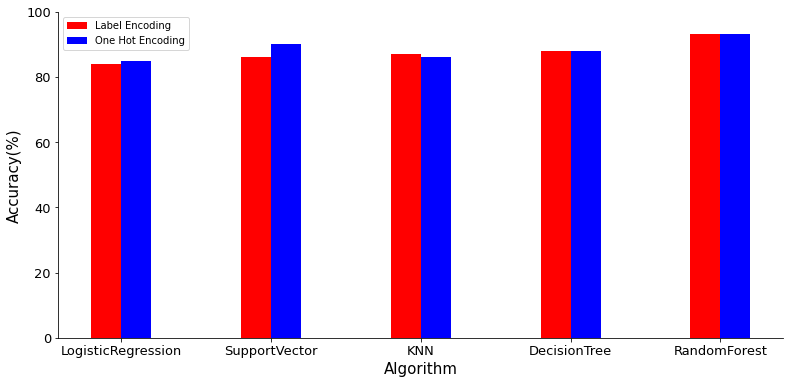

In [93]:
algo=['LogisticRegression','SupportVector','KNN','DecisionTree','RandomForest']
accur1=[84,86,87,88,93]
accur2=[85,90,86,88,93]
plt.figure(figsize=(13, 6))

width=0.2
p=np.arange(len(algo))
p1=[j+width for j in p]

plt.xlabel('Algorithm',fontsize=15)   
plt.ylabel('Accuracy(%)',fontsize=15)

  
plt.bar(p,accur1,width,color='r',label='Label Encoding')
plt.bar(p1,accur2,width,color='b',label='One Hot Encoding')

plt.xticks(p+width/2,algo)
plt.xticks(size=13)
plt.yticks(size=13)
plt.ylim(0,100)
sns.despine()
plt.legend()
plt.show()

### Conclusion -->

- We achieved about **93%** accuracy on both the test.
- Furthermore, came into the conclusion that the best algorithm to predict credit risk is **Random Forest Classifier** with a time span around 4.07 s.